In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import glob
import os

In [42]:
import os
print(os.listdir("/content"))


['.config', 'INDIA-AQI', '.ipynb_checkpoints', 'sample_data']


In [43]:
print(os.listdir("/content/INDIA-AQI"))


['Bangalore_AQI_Dataset.csv', 'Delhi_AQI_Dataset.csv', 'Hyderabad_AQI_Dataset.csv', 'Mumbai_AQI_Dataset.csv', '.ipynb_checkpoints', 'Chennai_AQI_Dataset.csv']


In [44]:
import glob
import pandas as pd

all_files = glob.glob("/content/INDIA-AQI/*AQI*.csv")

print("Files found:", all_files)

df_list = [pd.read_csv(file) for file in all_files]

air_df = pd.concat(df_list, ignore_index=True)

air_df.shape


Files found: ['/content/INDIA-AQI/Bangalore_AQI_Dataset.csv', '/content/INDIA-AQI/Delhi_AQI_Dataset.csv', '/content/INDIA-AQI/Hyderabad_AQI_Dataset.csv', '/content/INDIA-AQI/Mumbai_AQI_Dataset.csv', '/content/INDIA-AQI/Chennai_AQI_Dataset.csv']


(12042, 22)

In [45]:
required_columns = ['City','Date','AQI','PM2.5','PM10','NO2','SO2','CO','O3']
air_df = air_df[required_columns]
air_df.isnull().sum()
air_df.dropna(inplace=True)

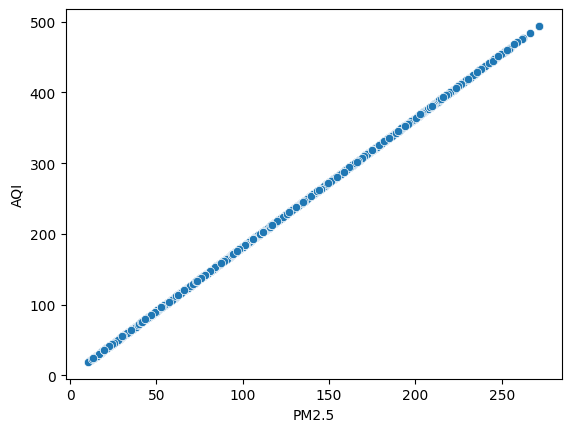

In [46]:
sns.scatterplot(x='PM2.5', y='AQI', data=air_df)
plt.show()


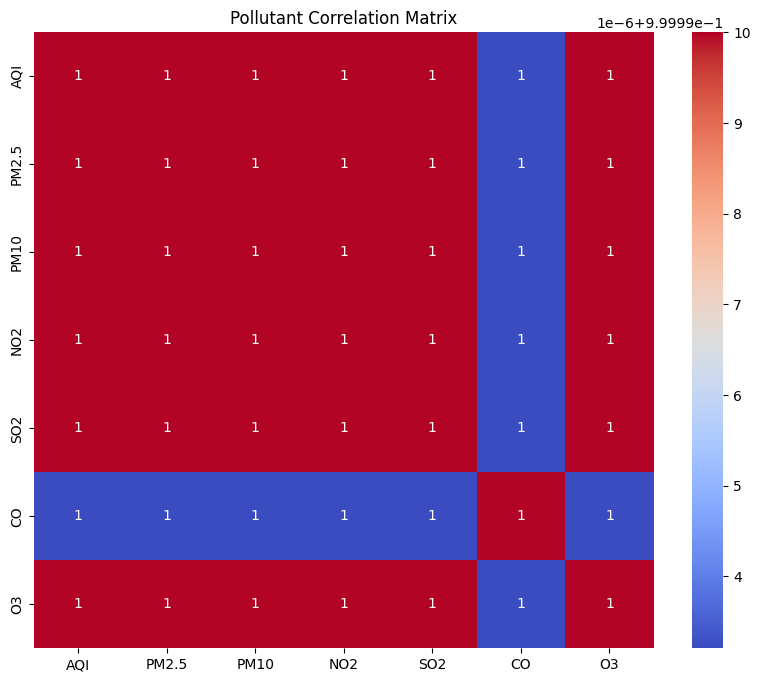

In [47]:
numeric_df = air_df[['AQI','PM2.5','PM10','NO2','SO2','CO','O3']]

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Pollutant Correlation Matrix")
plt.show()


/tmp/ipython-input-1474418954.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  air_df['Year'] = pd.to_datetime(air_df['Date']).dt.year


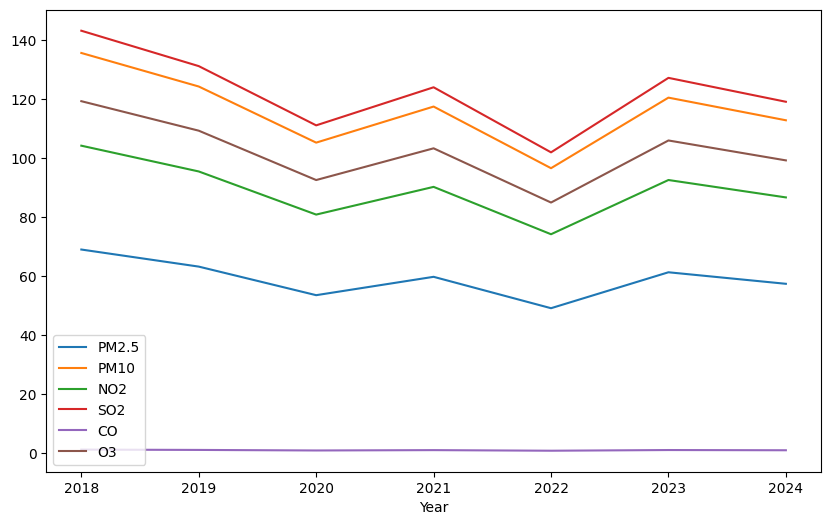

In [48]:
air_df['Year'] = pd.to_datetime(air_df['Date']).dt.year

year_pollution = air_df.groupby('Year')[['PM2.5','PM10','NO2','SO2','CO','O3']].mean()

year_pollution.plot(figsize=(10,6))
plt.show()

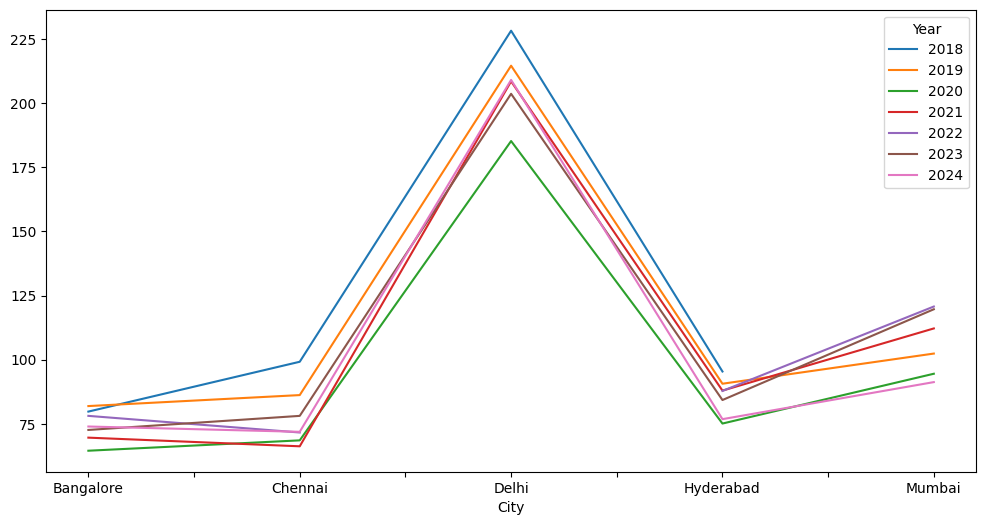

In [49]:
city_year = air_df.groupby(['City','Year'])['AQI'].mean().unstack()

city_year.plot(figsize=(12,6))
plt.show()

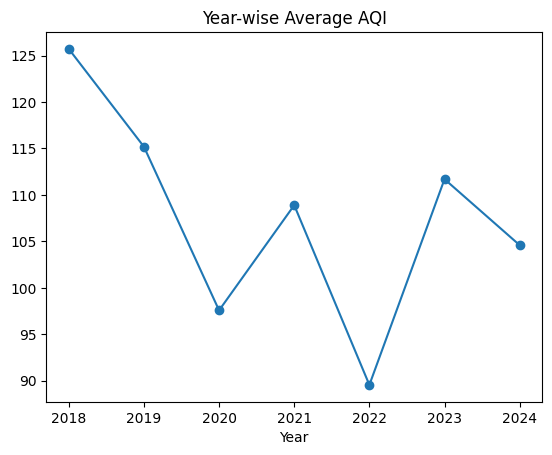

In [50]:
year_aqi = air_df.groupby('Year')['AQI'].mean()

year_aqi.plot(marker='o')
plt.title("Year-wise Average AQI")
plt.show()

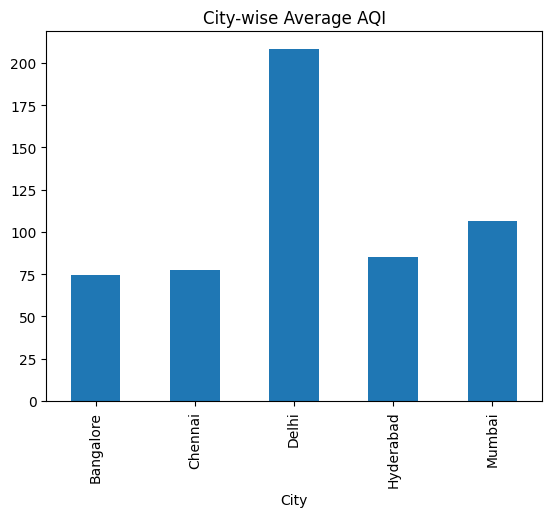

In [51]:
city_avg = air_df.groupby('City')['AQI'].mean()

city_avg.plot(kind='bar')
plt.title("City-wise Average AQI")
plt.show()

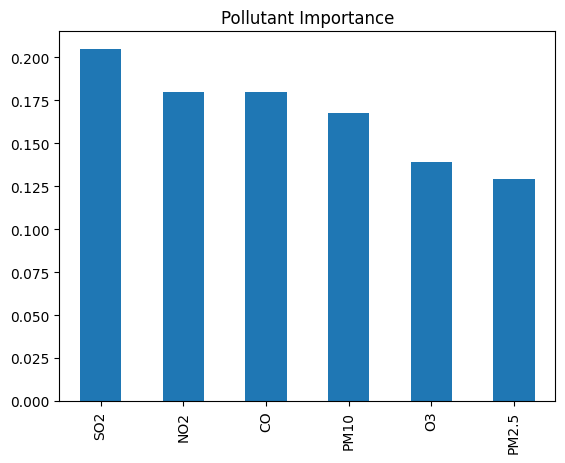

In [52]:
X = air_df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = air_df['AQI']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Pollutant Importance")
plt.show()

In [53]:
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

air_df['AQI_Category'] = air_df['AQI'].apply(classify_aqi)

In [54]:
X = air_df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = air_df['AQI']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression RMSE: 1.503372410727128e-13
Linear Regression R2: 1.0


In [58]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 0.06269841895383707
Random Forest R2: 0.9999993073513234


In [59]:
policy_data = X_test.copy()

policy_data['PM2.5'] = policy_data['PM2.5'] * 0.7

aqi_before = rf_model.predict(X_test)
aqi_after = rf_model.predict(policy_data)

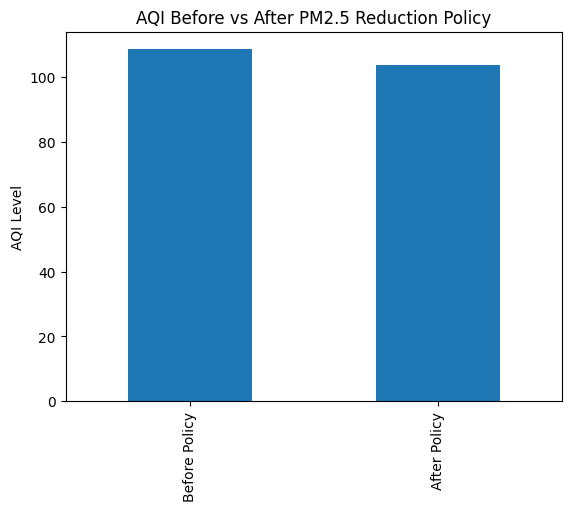

In [60]:
comparison = pd.DataFrame({
    'Before Policy': aqi_before,
    'After Policy': aqi_after
})

comparison.mean().plot(kind='bar')
plt.title("AQI Before vs After PM2.5 Reduction Policy")
plt.ylabel("AQI Level")
plt.show()